In [ ]:
from google.colab import files
upload_files = files.upload()

Saving comedy.xlsx to comedy.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('comedy.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          13 non-null     int64 
 1   experience   13 non-null     int64 
 2   rank         13 non-null     int64 
 3   nationality  13 non-null     object
 4   go           13 non-null     object
dtypes: int64(3), object(2)
memory usage: 648.0+ bytes


In [ ]:
df.describe()

,age,experience,rank
count,13.000000,13.000000,13.000000
mean,39.615385,8.846154,6.846154
std,13.263600,5.727800,1.908147
min,18.000000,3.000000,4.000000
25%,35.000000,4.000000,5.000000
50%,42.000000,9.000000,7.000000
75%,45.000000,13.000000,9.000000
max,66.000000,21.000000,9.000000


In [ ]:
X_features = list(df.columns)
X_features.remove('go')
encoded_df = pd.get_dummies(df[X_features],drop_first=True)
print(list(encoded_df.columns))

['age', 'experience', 'rank', 'nationality_N ', 'nationality_UK', 'nationality_USA']


In [ ]:
X = encoded_df
Y = df['go']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred_y = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Confusion Matrix is\n",metrics.confusion_matrix(pred_y, y_test))
print("Accuracy is", metrics.accuracy_score(pred_y,y_test))


Confusion Matrix is
 [[0 0]
 [1 3]]
Accuracy is 0.75


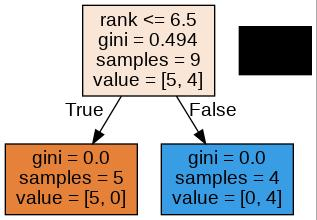

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
export_graphviz(clf,out_file = "tree.odt", feature_names = X_train.columns, filled = True)
graph = pdot.graphviz.graph_from_dot_file("tree.odt")
graph.write_jpg("tree.png")
Image(filename = "tree.png")